# Full scale comparisons with MNIST

First, we need to install einops

In [1]:
!pip install einops

This is used only with Kaggle

In [2]:
import sys
sys.path.insert(1, '../input/diffusion-code/')

Various imports

In [3]:
from Diffusion import Diffusion, OptimizerData, SchedulerData

import torch
from torchvision import transforms
from torchvision.transforms import ToTensor, Resize
import torchvision.datasets as datasets
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

This command makes everything replicable

In [4]:
torch.manual_seed(0)

Various hyperparameters common to all the models

In [5]:
batch_size    = 32
n_channels    = 1
x_sz          = 32
verbose       = 1
n_iters       = 5
data_slice_tr = 0
data_slice_vl = 0
device        = 'cuda'

opt_data      = OptimizerData(torch.optim.Adam, lr = 1e-4, eps = 1e-4)
#sched_data    = SchedulerData(torch.optim.lr_scheduler.MultiStepLR, milestones=[5], gamma=0.1)
              
sample_iters  = 1000
              
init_dim      = None
dim_mults     = (1, 2, 4)

resnet_block_groups = 8


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32, 32))
])

mnist_tr_set = datasets.FashionMNIST(root='./data', train=True,  download=True, transform=transform)
mnist_ts_set = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
n_channels = 1
x_sz = 32

#Sampled images per model
n = 10

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



We create a partial so we don't have to rewrite all the hyperparameters every single time.

In [6]:
d = partial(Diffusion, 
            batch_size    = batch_size,
            n_channels    = n_channels,
            x_sz          = x_sz,
            verbose       = verbose,
            n_iters       = n_iters,
            data_slice_tr = data_slice_tr,
            data_slice_vl = data_slice_vl,
            device        = device,
            
            opt_data      = opt_data,
            #sched_data    = sched_data,
              
            sample_iters  = sample_iters,
              
            init_dim      = init_dim,
            dim_mults     = dim_mults,
            
            resnet_block_groups = resnet_block_groups)

We can now start our tests

## FAVOR+ with softmax kernel and m = 1

In [7]:
diffusion = d(m = 1, use_original = False, att_type = 'FAVOR_SDP')

diffusion.to(device)
diffusion.fit(mnist_tr_set, mnist_ts_set)

#saves the important stuff
d_m_1_FAVORSDP_tr_loss = diffusion.tr_loss_arr.copy()
d_m_1_FAVORSDP_vl_loss = diffusion.vl_loss_arr.copy()

#samples 10 images
d_m_1_FAVORSDP_images = []
for i in range(1, n + 1):
    d_m_1_FAVORSDP_images.append(diffusion.sample(verbose_steps = 0).cpu().numpy().reshape(32, 32, 1).copy())

using FAVOR+ with SDP
using FAVOR+ with SDP
using FAVOR+ with SDP
Using standard attention
using FAVOR+ with SDP
using FAVOR+ with SDP
using FAVOR+ with SDP


epoch 0 step 312 vl loss = 0.02020: 100%|██████████| 313/313 [00:09<00:00, 32.49it/s]


epoch 0 tr loss = 0.03433, vl_loss = 0.01877


epoch 1 step 312 vl loss = 0.00565: 100%|██████████| 313/313 [00:09<00:00, 33.18it/s]


epoch 1 tr loss = 0.01672, vl_loss = 0.01433


epoch 2 step 312 vl loss = 0.02268: 100%|██████████| 313/313 [00:09<00:00, 33.04it/s]


epoch 2 tr loss = 0.01448, vl_loss = 0.01409


epoch 3 step 312 vl loss = 0.00991: 100%|██████████| 313/313 [00:08<00:00, 36.24it/s]


epoch 3 tr loss = 0.01351, vl_loss = 0.01339


epoch 4 step 312 vl loss = 0.00724: 100%|██████████| 313/313 [00:08<00:00, 34.80it/s]


epoch 4 tr loss = 0.01295, vl_loss = 0.01272


## FAVOR+ with softmax kernel and m = None

In [8]:
diffusion = d(m = None, use_original = False, att_type = 'FAVOR_SDP')

diffusion.to(device)
diffusion.fit(mnist_tr_set, mnist_ts_set)

#saves the important stuff
d_m_None_FAVORSDP_tr_loss = diffusion.tr_loss_arr.copy()
d_m_None_FAVORSDP_vl_loss = diffusion.vl_loss_arr.copy()

#samples 10 images
d_m_None_FAVORSDP_images = []
for i in range(1, n + 1):
    d_m_None_FAVORSDP_images.append(diffusion.sample(verbose_steps = 0).cpu().numpy().reshape(32, 32, 1).copy())

using FAVOR+ with SDP
using FAVOR+ with SDP
curr_m modified to  64  (curr_L =  64.0 , optimal m =  128 )
using FAVOR+ with SDP
Using standard attention
curr_m modified to  64  (curr_L =  64.0 , optimal m =  128 )
using FAVOR+ with SDP
using FAVOR+ with SDP
using FAVOR+ with SDP


epoch 0 step 312 vl loss = 0.01480: 100%|██████████| 313/313 [00:11<00:00, 28.18it/s]


epoch 0 tr loss = 0.03493, vl_loss = 0.01801


epoch 1 step 312 vl loss = 0.00479: 100%|██████████| 313/313 [00:11<00:00, 28.29it/s]


epoch 1 tr loss = 0.01634, vl_loss = 0.01525


epoch 2 step 312 vl loss = 0.00708: 100%|██████████| 313/313 [00:11<00:00, 27.75it/s]


epoch 2 tr loss = 0.01425, vl_loss = 0.01405


epoch 3 step 312 vl loss = 0.01659: 100%|██████████| 313/313 [00:11<00:00, 27.39it/s]


epoch 3 tr loss = 0.01329, vl_loss = 0.01360


epoch 4 step 312 vl loss = 0.01207: 100%|██████████| 313/313 [00:11<00:00, 27.40it/s]


epoch 4 tr loss = 0.01305, vl_loss = 0.01294


## FAVOR+ with ReLU kernel and m = 1

In [9]:
diffusion = d(m = 1, use_original = False, att_type = 'FAVOR_RELU')

diffusion.to(device)
diffusion.fit(mnist_tr_set, mnist_ts_set)

#saves the important stuff
d_m_1_FAVORRELU_tr_loss = diffusion.tr_loss_arr.copy()
d_m_1_FAVORRELU_vl_loss = diffusion.vl_loss_arr.copy()

#samples 10 images
d_m_1_FAVORRELU_images = []
for i in range(1, n + 1):
    d_m_1_FAVORRELU_images.append(diffusion.sample(verbose_steps = 0).cpu().numpy().reshape(32, 32, 1).copy())

using FAVOR+ with RELU
using FAVOR+ with RELU
using FAVOR+ with RELU
Using standard attention
using FAVOR+ with RELU
using FAVOR+ with RELU
using FAVOR+ with RELU


epoch 0 step 312 vl loss = 0.03728: 100%|██████████| 313/313 [00:09<00:00, 32.41it/s]


epoch 0 tr loss = 0.03376, vl_loss = 0.01858


epoch 1 step 312 vl loss = 0.01314: 100%|██████████| 313/313 [00:09<00:00, 34.52it/s]


epoch 1 tr loss = 0.01659, vl_loss = 0.01486


epoch 2 step 312 vl loss = 0.04096: 100%|██████████| 313/313 [00:09<00:00, 34.37it/s]


epoch 2 tr loss = 0.01459, vl_loss = 0.01430


epoch 3 step 312 vl loss = 0.00576: 100%|██████████| 313/313 [00:09<00:00, 33.74it/s]


epoch 3 tr loss = 0.01343, vl_loss = 0.01293


epoch 4 step 312 vl loss = 0.00549: 100%|██████████| 313/313 [00:09<00:00, 34.64it/s]


epoch 4 tr loss = 0.01284, vl_loss = 0.01253


## FAVOR+ with ReLU kernel and m = None

In [10]:
diffusion = d(m = None, use_original = False, att_type = 'FAVOR_RELU')

diffusion.to(device)
diffusion.fit(mnist_tr_set, mnist_ts_set)

#saves the important stuff
d_m_None_FAVORRELU_tr_loss = diffusion.tr_loss_arr.copy()
d_m_None_FAVORRELU_vl_loss = diffusion.vl_loss_arr.copy()

#samples 10 images
d_m_None_FAVORRELU_images = []
for i in range(1, n + 1):
    d_m_None_FAVORRELU_images.append(diffusion.sample(verbose_steps = 0).cpu().numpy().reshape(32, 32, 1).copy())

using FAVOR+ with RELU
using FAVOR+ with RELU
curr_m modified to  64  (curr_L =  64.0 , optimal m =  128 )
using FAVOR+ with RELU
Using standard attention
curr_m modified to  64  (curr_L =  64.0 , optimal m =  128 )
using FAVOR+ with RELU
using FAVOR+ with RELU
using FAVOR+ with RELU


epoch 0 step 312 vl loss = 0.01491: 100%|██████████| 313/313 [00:11<00:00, 27.77it/s]


epoch 0 tr loss = 0.03525, vl_loss = 0.01764


epoch 1 step 312 vl loss = 0.00630: 100%|██████████| 313/313 [00:11<00:00, 27.38it/s]


epoch 1 tr loss = 0.01593, vl_loss = 0.01527


epoch 2 step 312 vl loss = 0.00738: 100%|██████████| 313/313 [00:11<00:00, 27.96it/s]


epoch 2 tr loss = 0.01428, vl_loss = 0.01383


epoch 3 step 312 vl loss = 0.00498: 100%|██████████| 313/313 [00:11<00:00, 27.06it/s]


epoch 3 tr loss = 0.01342, vl_loss = 0.01229


epoch 4 step 312 vl loss = 0.01523: 100%|██████████| 313/313 [00:11<00:00, 27.06it/s]


epoch 4 tr loss = 0.01266, vl_loss = 0.01255


## Standard Attention

In [11]:
diffusion = d(use_original = False, att_type = 'SDP')

diffusion.to(device)
diffusion.fit(mnist_tr_set, mnist_ts_set)

#saves the important stuff
d_SDP_tr_loss = diffusion.tr_loss_arr.copy()
d_SDP_vl_loss = diffusion.vl_loss_arr.copy()

#samples 10 images
d_SDP_images = []
for i in range(1, n + 1):
    d_SDP_images.append(diffusion.sample(verbose_steps = 0).cpu().numpy().reshape(32, 32, 1).copy())

Using standard attention
Using standard attention
curr_m modified to  64  (curr_L =  64.0 , optimal m =  128 )
Using standard attention
Using standard attention
curr_m modified to  64  (curr_L =  64.0 , optimal m =  128 )
Using standard attention
Using standard attention
Using standard attention


epoch 0 step 312 vl loss = 0.01335: 100%|██████████| 313/313 [00:15<00:00, 20.39it/s]


epoch 0 tr loss = 0.03408, vl_loss = 0.01891


epoch 1 step 312 vl loss = 0.01900: 100%|██████████| 313/313 [00:15<00:00, 20.69it/s]


epoch 1 tr loss = 0.01625, vl_loss = 0.01491


epoch 2 step 312 vl loss = 0.00763: 100%|██████████| 313/313 [00:15<00:00, 20.57it/s]


epoch 2 tr loss = 0.01436, vl_loss = 0.01389


epoch 3 step 312 vl loss = 0.00856: 100%|██████████| 313/313 [00:15<00:00, 20.82it/s]


epoch 3 tr loss = 0.01359, vl_loss = 0.01352


epoch 4 step 312 vl loss = 0.01736: 100%|██████████| 313/313 [00:15<00:00, 20.62it/s]


epoch 4 tr loss = 0.01291, vl_loss = 0.01242


## Original implementation (Linear Attention)

In [12]:
diffusion = d(use_original = True)

diffusion.to(device)
diffusion.fit(mnist_tr_set, mnist_ts_set)

#saves the important stuff
d_linear_tr_loss = diffusion.tr_loss_arr.copy()
d_linear_vl_loss = diffusion.vl_loss_arr.copy()

#samples 10 images
d_linear_images = []
for i in range(1, n + 1):
    d_linear_images.append(diffusion.sample(verbose_steps = 0).cpu().numpy().reshape(32, 32, 1).copy())

epoch 0 step 312 vl loss = 0.04446: 100%|██████████| 313/313 [00:08<00:00, 37.45it/s]


epoch 0 tr loss = 0.03653, vl_loss = 0.01809


epoch 1 step 312 vl loss = 0.00571: 100%|██████████| 313/313 [00:08<00:00, 37.81it/s]


epoch 1 tr loss = 0.01666, vl_loss = 0.01470


epoch 2 step 312 vl loss = 0.01685: 100%|██████████| 313/313 [00:08<00:00, 39.06it/s]


epoch 2 tr loss = 0.01444, vl_loss = 0.01443


epoch 3 step 312 vl loss = 0.00903: 100%|██████████| 313/313 [00:08<00:00, 38.84it/s]


epoch 3 tr loss = 0.01361, vl_loss = 0.01360


epoch 4 step 312 vl loss = 0.01919: 100%|██████████| 313/313 [00:08<00:00, 38.84it/s]


epoch 4 tr loss = 0.01304, vl_loss = 0.01309


# Comparisons

## Training Loss

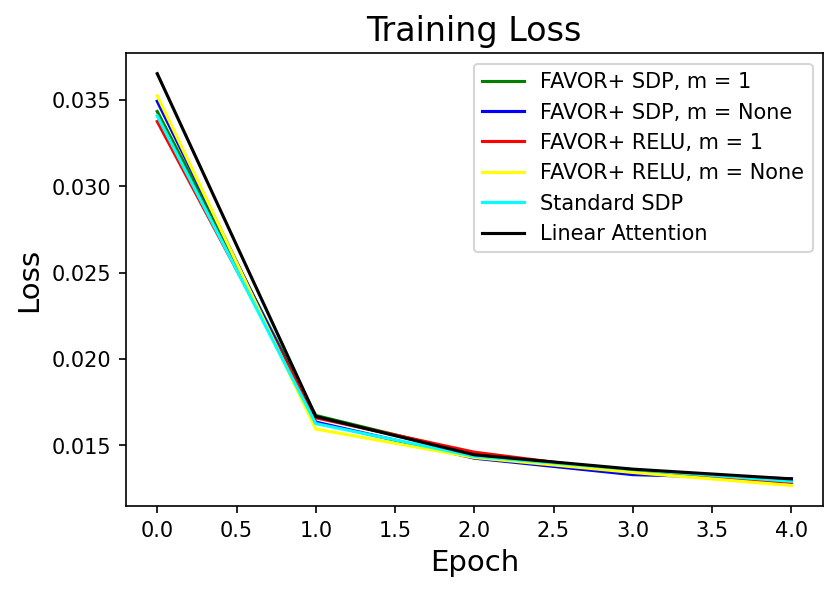

In [13]:
plt.figure(dpi = 150)
plt.plot(d_m_1_FAVORSDP_tr_loss, label='FAVOR+ SDP, m = 1', color='green')
plt.plot(d_m_None_FAVORSDP_tr_loss, label='FAVOR+ SDP, m = None', color='blue')
plt.plot(d_m_1_FAVORRELU_tr_loss, label='FAVOR+ RELU, m = 1', color='red')
plt.plot(d_m_None_FAVORRELU_tr_loss, label='FAVOR+ RELU, m = None', color='yellow')
plt.plot(d_SDP_tr_loss, label='Standard SDP', color='cyan')
plt.plot(d_linear_tr_loss, label='Linear Attention', color='black')
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.title('Training Loss', fontsize=16)
plt.legend()
plt.show()

Zooming in:

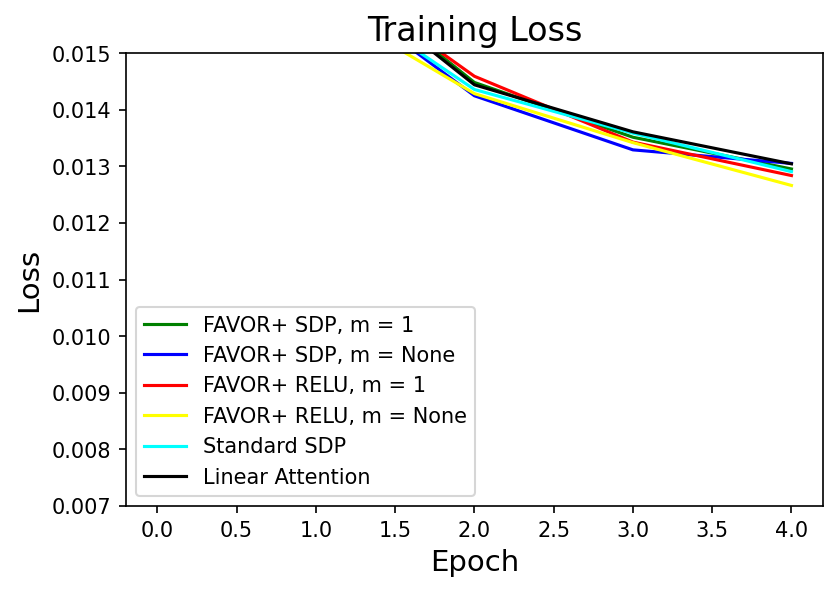

In [17]:
plt.figure(dpi = 150)
plt.plot(d_m_1_FAVORSDP_tr_loss, label='FAVOR+ SDP, m = 1', color='green')
plt.plot(d_m_None_FAVORSDP_tr_loss, label='FAVOR+ SDP, m = None', color='blue')
plt.plot(d_m_1_FAVORRELU_tr_loss, label='FAVOR+ RELU, m = 1', color='red')
plt.plot(d_m_None_FAVORRELU_tr_loss, label='FAVOR+ RELU, m = None', color='yellow')
plt.plot(d_SDP_tr_loss, label='Standard SDP', color='cyan')
plt.plot(d_linear_tr_loss, label='Linear Attention', color='black')
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.title('Training Loss', fontsize=16)
plt.ylim(.007, .015)
plt.legend()
plt.show()

## Plots 10 samples for each model

<Figure size 432x288 with 0 Axes>

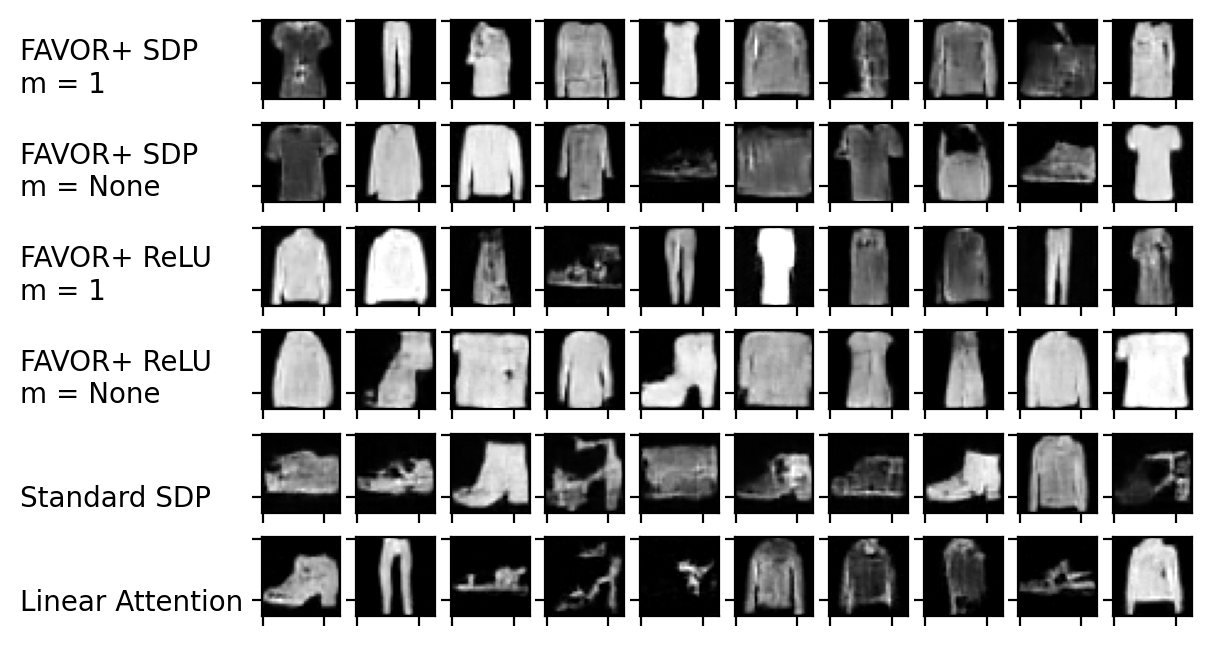

In [16]:
plt.figure()



rows_names = ['FAVOR+ SDP\nm = 1', 'FAVOR+ SDP\nm = None', 'FAVOR+ ReLU\nm = 1', 'FAVOR+ ReLU\nm = None', 'Standard SDP', 'Linear Attention']
arrs = [d_m_1_FAVORSDP_images, d_m_None_FAVORSDP_images, d_m_1_FAVORRELU_images, d_m_None_FAVORRELU_images, d_SDP_images, d_linear_images]

fig, axs = plt.subplots(len(rows_names), n)
fig.dpi = 200

for i in range(len(rows_names)):
    axs[i,0].set_ylabel(rows_names[i], rotation=0, labelpad = 80, loc = 'bottom')
    for j in range(n):
        axs[i, j].imshow(arrs[i][j], cmap='gray', vmin=0, vmax = 1)

        
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set_xticklabels([])
    ax.set_yticklabels([])